### Ben Porter
### This HW is due on  11/17 at 11:59 pm


You will be working with the movie data downloaded from here https://www.kaggle.com/karrrimba/movie-metadatacsv. Please follow the link and read more about it. This HW is little more invloved than the others. I will only tell you the main idea and what you need to do. You will have to take several baby steps doing data analysis yourself. We will grade it based on the effort, details of your work, summary, comments and finally the accuracy score of your model on the test data.

In [2]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as sm
moviedata = pd.read_csv('moviedata.csv')

### Problem 1.  
Upload the movie data and do all the basic analysis such as finding and dealing with missing values, separating numerical and categorical variables etc.  Our goal here is to train a linear regression model. So, we are mainly interested in numerical features. Sometimes, we can turn categorical variables to different numerical levels  and actually use those categorical variables also as  features in our regression model. Please note that one of the major  factor in grading this problem is your accuracy score on a test data set so do what you can to raise it as high as you can. Find the features you want to use, treat imdb_score as a dependent variable, split the data in test and train set with appropriate rule and train a linear model.
Report the accuracy of your testing and training set. (40 points)

In [383]:
md =moviedata.dropna(how = 'any')

In [384]:
md.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


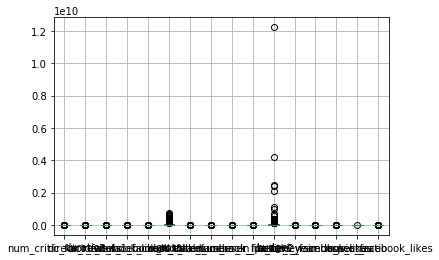

In [385]:
md.boxplot()

In [386]:
Q1 = md.quantile(0.25)
Q3 = md.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
md.shape

num_critic_for_reviews            147.00
duration                           24.00
director_facebook_likes           224.00
actor_3_facebook_likes            497.00
actor_1_facebook_likes          12255.00
gross                        58611708.00
num_voted_users                108935.00
cast_total_facebook_likes       14320.25
facenumber_in_poster                2.00
num_user_for_reviews              288.25
budget                       40000000.00
title_year                         11.00
actor_2_facebook_likes            591.25
imdb_score                          1.30
aspect_ratio                        0.50
movie_facebook_likes            11000.00
dtype: float64


(3756, 28)

In [387]:
md1 = md[~((md < (Q1 - 1.5 * IQR)) |(md > (Q3 + 1.5 * IQR))).any(axis=1)]
md1.shape

(2043, 28)

In [388]:
md1.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [389]:
md1.color.unique()

array(['Color', ' Black and White'], dtype=object)

In [390]:
md1.content_rating.unique()

array(['PG-13', 'G', 'R', 'PG', 'Not Rated', 'Unrated', 'X', 'NC-17'],
      dtype=object)

In [391]:
md2=md1

In [392]:
#md2['color'].replace('Color', 0,inplace=True)
#md2['color'].replace('Black and White', 1,inplace=True)

In [393]:
md2['content_rating'].replace('PG-13', 0,inplace=True)
md2['content_rating'].replace('G', 0,inplace=True)
md2['content_rating'].replace('R', 0,inplace=True)
md2['content_rating'].replace('PG', 0,inplace=True)
md2['content_rating'].replace('Not Rated', 0,inplace=True)
md2['content_rating'].replace('Unrated', 0,inplace=True)
md2['content_rating'].replace('X', 0,inplace=True)
md2['content_rating'].replace('NC-17', 0,inplace=True)

C:\Users\bman1\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [394]:
md_numerical = md1.drop(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country'], axis=1)

In [395]:
md_numerical.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
content_rating                 int64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [396]:
print(md_numerical.shape)
list(md_numerical.columns)

(2043, 17)


['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [397]:
x = md_numerical.loc[: , ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']]
y = md_numerical.loc[:, 'imdb_score']

In [398]:
import statsmodels.api as sm1
x = sm1.add_constant(x)

C:\Users\bman1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


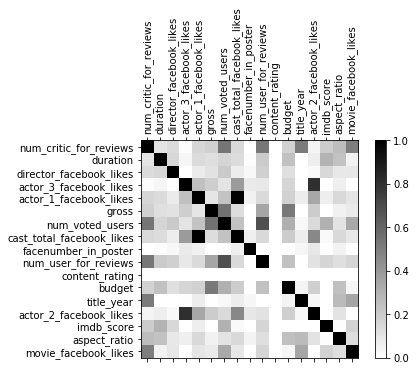

In [399]:
corr = md_numerical.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='binary', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(md_numerical.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(md_numerical.columns)
ax.set_yticklabels(md_numerical.columns)
plt.show()

In [400]:
train, test = train_test_split(md_numerical, test_size=0.39,
random_state=1)
x1 = train.loc[: , ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']]
y1 = train.loc[:, 'imdb_score']

In [401]:
x1=sm1.add_constant(x1)

In [402]:
mod1 = sm.ols('y1 ~ x1',train).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     48.32
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          2.16e-112
Time:                        23:07:05   Log-Likelihood:                -1330.0
No. Observations:                1246   AIC:                             2692.
Df Residuals:                    1230   BIC:                             2774.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1494      3.817      3.969      0.000       7.662      22.637
x1[0]         15.1494      3.817      3.969      0.000       7.662      22.637
x1[1]          0.0013      0.000      3.009      0.003       0.000       0.002
x1[2]          0.0198      0.002     12.911      0.000       0.017       0.023
x1[3]          0.0005      0.000      3.279      0.001       0.000       0.001
x1[4]          0.0004      0.000      2.122      0.034    3.05e-05       0.001
x1[5]          0.0002   4.38e-05      3.600      0.000    7.17e-05       0.000
x1[6]       -4.05e-09   8.76e-10     -4.622      0.000   -5.77e-09   -2.33e-09
x1[7]       9.189e-06   6.78e-07     13.547      0.000    7.86e-06    1.05e-05
x1[8]         -0.0002   4.35e-05     -3.522      0.000      -0.000   -6.78e-05
x1[9]         -0.0434      0.016     -2.727      0.006      -0.075      -0.012
x1[10]        -0.0014      0.000     -6.730      0.000      -0.002      -0.001
x1[11]      4.292e-12   1.08e-12      3.969      0.000    2.17e-12    6.41e-12
x1[12]     -8.843e-09   1.09e-09     -8.102      0.000    -1.1e-08    -6.7e-09
x1[13]        -0.0128      0.004     -3.339      0.001      -0.020      -0.005
x1[14]        -0.0003      0.000     -2.393      0.017      -0.001   -5.32e-05
x1[15]        -0.1294      0.086     -1.510      0.131      -0.297       0.039
x1[16]      9.748e-07   4.08e-06      0.239      0.811   -7.03e-06    8.98e-06
==============================================================================
Omnibus:                        6.063   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.097
Skew:                          -0.156   Prob(JB):                       0.0474
Kurtosis:                       2.859   Cond. No.                     1.08e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [403]:
x2 = test.loc[: , ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']]
y2 = test.loc[:, 'imdb_score']

In [404]:
x2=sm1.add_constant(x2)

In [405]:
mod2 = sm.ols('y2 ~ x2',test).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     26.16
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           3.06e-59
Time:                        23:07:13   Log-Likelihood:                -838.54
No. Observations:                 797   AIC:                             1709.
Df Residuals:                     781   BIC:                             1784.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7558      4.947      2.983      0.003       5.045      24.466
x2[0]         14.7558      4.947      2.983      0.003       5.045      24.466
x2[1]          0.0010      0.001      1.824      0.068   -7.78e-05       0.002
x2[2]          0.0179      0.002     10.041      0.000       0.014       0.021
x2[3]          0.0003      0.000      1.613      0.107    -7.3e-05       0.001
x2[4]          0.0002      0.000      0.826      0.409      -0.000       0.001
x2[5]          0.0002   5.58e-05      3.216      0.001       7e-05       0.000
x2[6]      -2.455e-09   1.12e-09     -2.183      0.029   -4.66e-09   -2.47e-10
x2[7]       6.747e-06   9.11e-07      7.407      0.000    4.96e-06    8.53e-06
x2[8]         -0.0002   5.57e-05     -3.018      0.003      -0.000   -5.88e-05
x2[9]         -0.0203      0.020     -1.009      0.313      -0.060       0.019
x2[10]        -0.0005      0.000     -1.948      0.052      -0.001    3.72e-06
x2[11]     -1.689e-13   5.66e-14     -2.982      0.003    -2.8e-13   -5.77e-14
x2[12]     -1.369e-08   1.36e-09    -10.092      0.000   -1.63e-08    -1.1e-08
x2[13]        -0.0124      0.005     -2.506      0.012      -0.022      -0.003
x2[14]     -9.082e-05      0.000     -0.591      0.555      -0.000       0.000
x2[15]         0.0413      0.102      0.404      0.686      -0.160       0.242
x2[16]      6.616e-06   5.48e-06      1.207      0.228   -4.14e-06    1.74e-05
==============================================================================
Omnibus:                       12.961   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.379
Skew:                          -0.316   Prob(JB):                      0.00124
Kurtosis:                       2.951   Cond. No.                     8.05e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### I have tried everything I can think of and this is the best I have been able to come up with. I removed all of the missing values and I found and got rid of outliers that may have thrown off the model. I also found the correlation between the different columns and imdb_score hoping to see if there were any columns throwing the model off. I also added a constant hoping to increase the accuracy but it did not seem to affect the accuracy.

### Problem 2
Using the same data as in problem 1 ( the one you get after cleaning and other preprocessing), change the column 'imdb_score' as 'imdb_labels' in the following way.

imdb_score $\geq 8$ - excellent,

$6\leq$ imdb_score $<8$ - good,

$4\leq$ imdb_score $<6$ - average,

$2\leq$ imdb_score $<4$ - mediocre,

 imdb_score $<2$ - bad,
 
By dividing the data to test and train with an appropriate rule, train 2 classifiction models using logistic and k-NN. Report testing and training accuracy scores for both models together with their confusion matrices. Which one outperforms the other and why? (40 points)

In [406]:
a='excellent'
b='good'
c='average'
d='mediocre'
e='bad'

In [407]:
def score(n) -> str:
    if n >= 8:
        return a
    elif n >= 6:
        return b
    elif n>= 4:
        return c
    elif n>= 2:
        return d
    else:
        return e

In [408]:
#md_numerical.rename(columns = {'imdb_score':'imdb_labels'})


In [409]:
md_numerical['imdb_labels']=[score(n) for n in md_numerical['imdb_score']]

In [410]:
md_numerical1 = md_numerical.drop(['imdb_score'], axis=1)

In [411]:
md_numerical1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_labels
157,135.0,90.0,23.0,233.0,957.0,110332737.0,110788,1997,1.0,258.0,0,100000000.0,2005.0,550.0,2.35,2000,good
192,330.0,101.0,176.0,282.0,11000.0,118311368.0,245621,12406,1.0,514.0,0,110000000.0,2010.0,702.0,2.35,23000,good
209,159.0,101.0,107.0,56.0,688.0,131536019.0,58498,1031,0.0,99.0,0,103000000.0,2014.0,237.0,2.35,0,good
215,85.0,102.0,323.0,241.0,845.0,32694788.0,101411,1815,1.0,546.0,0,85000000.0,1999.0,372.0,2.35,0,good
224,276.0,123.0,160.0,402.0,12000.0,115802596.0,182661,14017,1.0,681.0,0,110000000.0,2007.0,701.0,2.35,0,average


In [412]:
x = md_numerical1.loc[: , ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'content_rating', 'budget', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']]
y = md_numerical1.loc[:, 'imdb_labels']

In [413]:
x1train, x1test, y1train, y1test = train_test_split(x, y, test_size=0.2)
lrmodel_1 = LogisticRegression(solver='lbfgs')
lrmodel_1.fit(x1train, y1train)
ypredlr_1 = lrmodel_1.predict(x1test)
ypredlr_1
print("Accuracy:",metrics.accuracy_score(y1test, ypredlr_1))
print(confusion_matrix(y1test, ypredlr_1))

Accuracy: 0.6625916870415648
[[ 52   0  87]
 [  0   0   4]
 [ 47   0 219]]


C:\Users\bman1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\bman1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [414]:
knnmodel = KNeighborsClassifier(n_neighbors=15)
knnmodel.fit(x1train,y1train)
ypred= knnmodel.predict(x1test)
print('Training Accuracy:')
print("Accuracy:",metrics.accuracy_score(y1test, ypred))
print(confusion_matrix(y1test, ypred))

print('')

ypred1= knnmodel.predict(x1train)
print('Testing Accuracy:')
print("Accuracy:",metrics.accuracy_score(y1train, ypred1))
print(confusion_matrix(y1train, ypred1))

Training Accuracy:
Accuracy: 0.6210268948655256
[[ 36   0 103]
 [  0   0   4]
 [ 48   0 218]]

Testing Accuracy:
Accuracy: 0.6854345165238678
[[162   0 394]
 [  2   0  13]
 [105   0 958]]


### Problme 3
Use the data you get at the end of problem 1 (after preprocessing and cleaning). Remove the imdb_score column. Train  Kmeans algorithm ( no need to split in test and train) and find 5 clusters. While we tried to use clustering as a classification in our lab,  it is not usualy done so. Also, Clustering algorithm just finds clusters and we do not usually find the accuracy for this. A lot of times, the clusters it finds has nothing to do with the response variable labels.  Once you find five clusters, plot 5 clusters with 5 different colors. Please pick num_voted_users in x axis and duration in y axis.(20 points)

In [415]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [416]:
y_kmeans

array([3, 3, 3, ..., 0, 0, 0])

In [1]:
x=np.array(x)
plt.scatter(x['num_voted_users'], x['duration'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

NameError: name 'np' is not defined